In [28]:
import numpy as np
import pandas as pd

In [29]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [32]:
df=pd.read_csv('../../results/ml_model_testing_results.csv',index_col=0)

In [38]:
grouped_df=df.groupby(by='model').agg(['mean','std'])
grouped_df.columns=pd.Series(grouped_df.columns.values).str.join(sep='_').values
grouped_df

,fit_time_mean,fit_time_std,score_time_mean,score_time_std,test_accuracy_mean,test_accuracy_std,test_roc_auc_mean,test_roc_auc_std
model,,,,,,,,
GNB,0.081062,0.029236,0.015584,0.000816,0.65330,0.008453,0.829345,0.006511
LR,0.766070,0.059524,0.015252,0.000936,0.83825,0.007671,0.916422,0.006090
MLP,16.405637,3.725067,0.026983,0.003310,0.91550,0.014465,0.977684,0.004974
RFC,13.280295,0.114818,0.085590,0.001427,0.97080,0.002730,0.996226,0.001072
SVC,49.919826,0.232115,12.106357,0.236947,0.80585,0.009925,0.909056,0.007540
XGB,20.352038,0.192357,0.038547,0.005522,0.99800,0.001000,0.999981,0.000019


In [40]:
grouped_df['test_accuracy_std']

model
GNB    0.008453
LR     0.007671
MLP    0.014465
RFC    0.002730
SVC    0.009925
XGB    0.001000
Name: test_accuracy_std, dtype: float64

In [52]:
grouped_df.index[0]

'GNB'

/var/folders/g2/9pvgl5793mxgz8dg4mhwym0m0000gn/T/ipykernel_6800/68979992.py:9: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  axs.annotate(grouped_df.index[0],xy=(x[0]+.02,y[0]-0.01),textcoords='offset points',fontsize=15)
/var/folders/g2/9pvgl5793mxgz8dg4mhwym0m0000gn/T/ipykernel_6800/68979992.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  axs.annotate(grouped_df.index[1],xy=(x[1]-.03,y[1]-0.01),textcoords='offset points',fontsize=15)
/var/folders/g2/9pvgl5793mxgz8dg4mhwym0m0000gn/T/ipykernel_6800/68979992.py:11: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  axs.annotate(grouped_df.index[2],xy=(x[2]-.03,y[2]-0.01),textcoords='offset points',fontsize=15)
/var/folders/g2/9pvgl5793mxgz8dg4mhwym0m0000gn/T/ipykernel_6800/68979992.py:12: UserWarning: You have used the `t

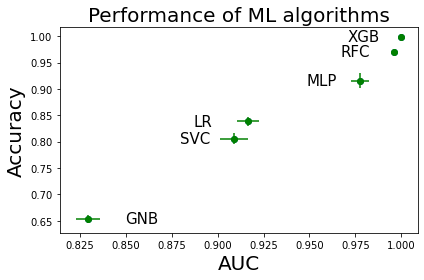

In [93]:
fig,axs=plt.subplots()
x,y=grouped_df['test_roc_auc_mean'].values,grouped_df['test_accuracy_mean'].values
model_scatter=axs.scatter(x,y)
axs.errorbar(
    x=grouped_df['test_roc_auc_mean'].values,y=grouped_df['test_accuracy_mean'].values,
    xerr=grouped_df['test_roc_auc_std'].values,yerr=grouped_df['test_accuracy_std'].values,
    fmt='o',c='g'
)
axs.annotate(grouped_df.index[0],xy=(x[0]+.02,y[0]-0.01),textcoords='offset points',fontsize=15)
axs.annotate(grouped_df.index[1],xy=(x[1]-.03,y[1]-0.01),textcoords='offset points',fontsize=15)
axs.annotate(grouped_df.index[2],xy=(x[2]-.03,y[2]-0.01),textcoords='offset points',fontsize=15)
axs.annotate(grouped_df.index[3],xy=(x[3]-.03,y[3]-0.01),textcoords='offset points',fontsize=15)
axs.annotate(grouped_df.index[4],xy=(x[4]-.03,y[4]-0.01),textcoords='offset points',fontsize=15)
axs.annotate(grouped_df.index[5],xy=(x[5]-.03,y[5]-0.01),textcoords='offset points',fontsize=15)
axs.set_title('Performance of ML algorithms',fontsize=20)
axs.set_ylabel('Accuracy',fontsize=20)
axs.set_xlabel('AUC',fontsize=20)
plt.tight_layout()
plt.savefig('../../results/ml_testing.png',dpi=400)